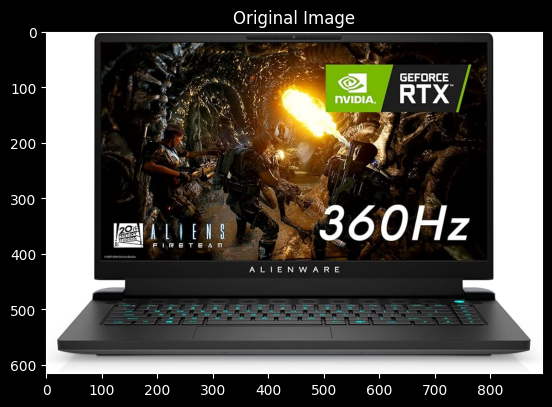

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('laptop.jpg')
if img is None:
    print("Khong tim thay file image")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.show()


###  Color Space Conversion


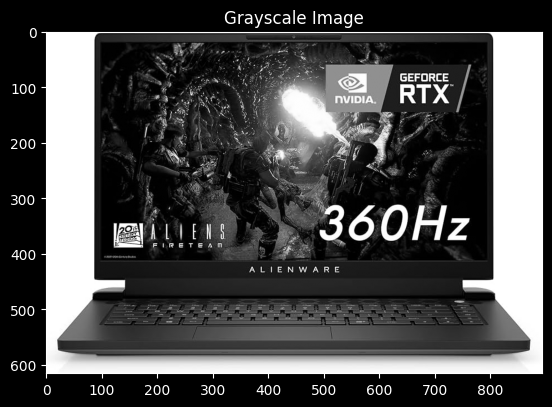

In [2]:
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()


### BT2.2: Xoay ảnh (Rotate)


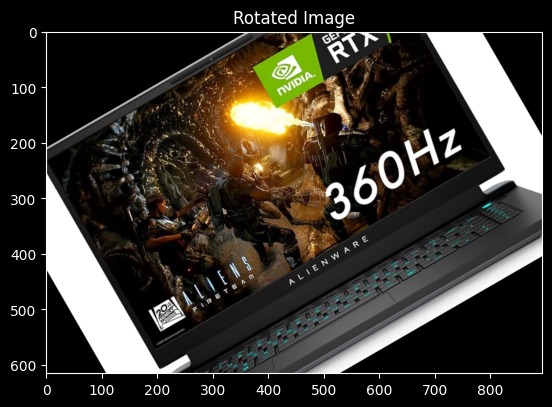

In [3]:
if img is not None:
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    # Xoay 45 độ quanh tâm ảnh
    M = cv2.getRotationMatrix2D(center, 30, 1.0)
    rotated = cv2.warpAffine(img_rgb, M, (w, h))
    plt.imshow(rotated)
    plt.title('Rotated Image')
    plt.show()


### BT2.3: Cắt ảnh (Crop)


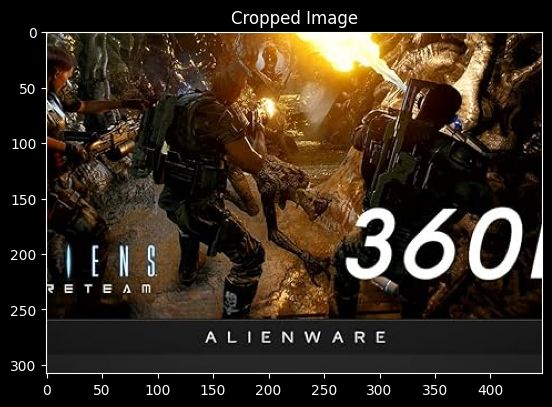

In [4]:
if img is not None:
    # Cắt phần trung tâm của ảnh
    start_row, start_col = int(h * .25), int(w * .25)
    end_row, end_col = int(h * .75), int(w * .75)
    cropped = img_rgb[start_row:end_row, start_col:end_col]
    plt.imshow(cropped)
    plt.title('Cropped Image')
    plt.show()


### BT2.4: Thay đổi kích thước (Resize)


In [ ]:
Em có 1 file .py viết riêng để tiện minh họa cho câu này ạ
Minh họa trong môi trường jupyterlab thì e có import thêm matplotlib để thể hiện các thông số ạ

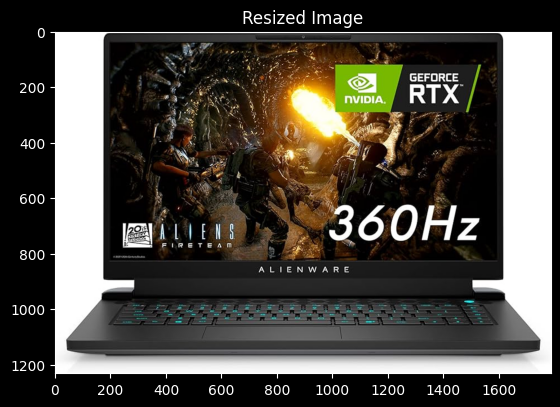

In [9]:
if img is not None:
    # Resize phóng to (Upscaling) - Tăng kích thước hiển thị nhưng không tăng độ chi tiết gốc
    # Sử dụng INTER_CUBIC để chất lượng tốt hơn khi phóng to
    resized_big = cv2.resize(img_rgb, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    plt.imshow(resized_big)
    plt.title('Resized Image')
    plt.show()


### Làm mờ (Blur)


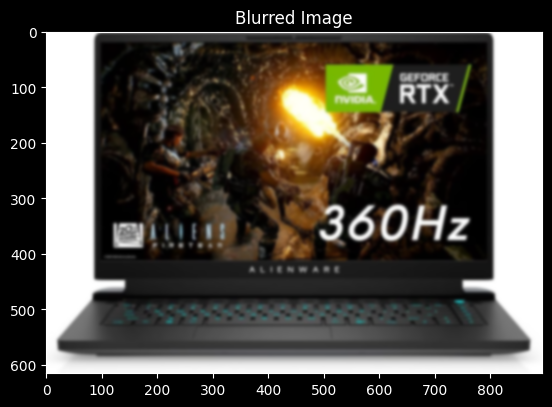

In [11]:
if img is not None:
    # Sử dụng Gaussian Blur
    blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)
    plt.imshow(blurred)
    plt.title('Blurred Image')
    plt.show()


### Thresholding


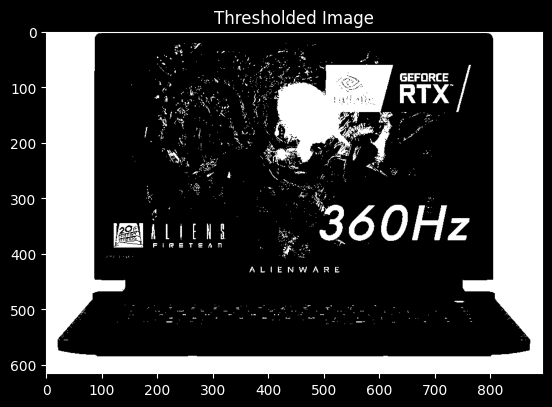

In [12]:
if img is not None:
    # Chuyển sang ảnh nhị phân với ngưỡng 127
    _, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()


### Tìm biên (Boundary/Edge detection)


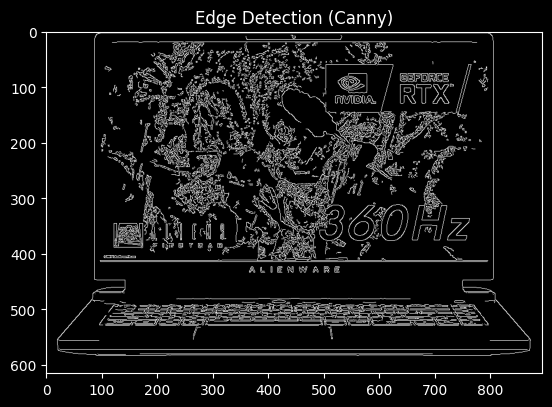

In [13]:
if img is not None:
    # Sử dụng thuật toán Canny để tìm biên
    edges = cv2.Canny(gray_img, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection (Canny)')
    plt.show()


### Lọc nhiễu (Noise Filtering)


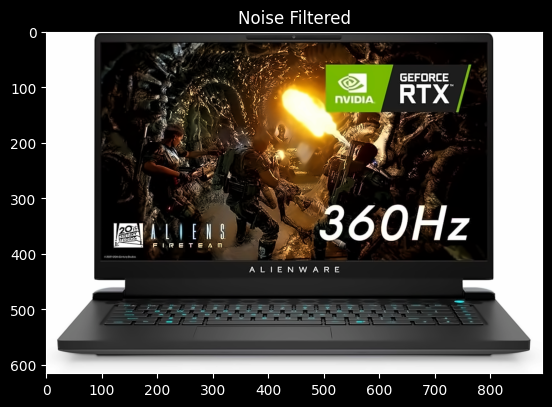

In [14]:
if img is not None:
    # Lọc nhiễu ảnh màu
    noise_filtered = cv2.fastNlMeansDenoisingColored(img_rgb, None, 10, 10, 7, 21)
    plt.imshow(noise_filtered)
    plt.title('Noise Filtered')
    plt.show()


### Background Subtraction (Tách ảnh khỏi nền)


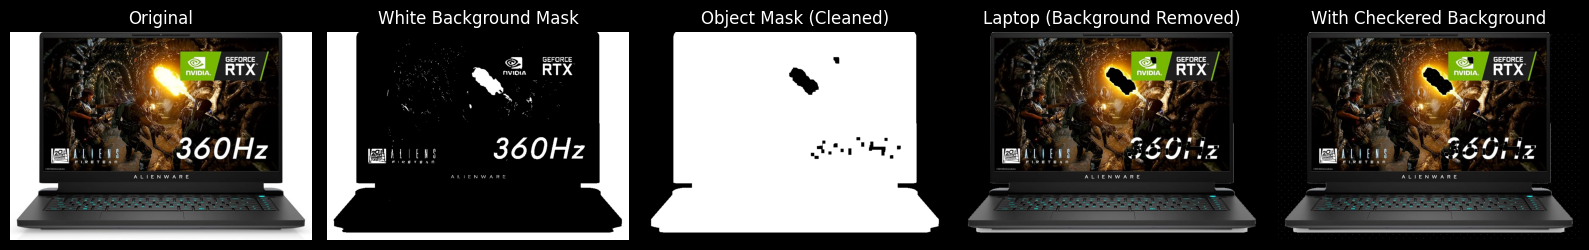

Mask shape: (616, 894)
Non-zero pixels (object): 428974
Zero pixels (background): 121730


In [28]:
# Phương pháp 1: Tách nền bằng Color Thresholding (cho nền trắng)
if img is not None:
    # Chuyển sang HSV để dễ phân tích màu
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Định nghĩa vùng màu trắng trong HSV
    # H (0-180), S (0-255), V (0-255)
    lower_white = np.array([0, 0, 200])  # Màu trắng có V cao, S thấp
    upper_white = np.array([180, 55, 255])
    
    # Tạo mask cho nền trắng
    mask_white = cv2.inRange(img_hsv, lower_white, upper_white)
    
    # Đảo ngược mask (0 -> 255, 255 -> 0) để lấy object
    mask_object = cv2.bitwise_not(mask_white)
    
    # Làm sạch mask bằng morphology operations
    kernel = np.ones((5, 5), np.uint8)
    mask_clean = cv2.morphologyEx(mask_object, cv2.MORPH_CLOSE, kernel, iterations=2)
    mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Tách laptop ra khỏi nền
    laptop_no_bg = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_clean)
    
    # Tạo nền trong suốt (RGBA)
    laptop_rgba = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2RGBA)
    laptop_rgba[:, :, 3] = mask_clean  # Set alpha channel
    
    # Hiển thị kết quả
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 5, 1)
    plt.imshow(img_rgb)
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 5, 2)
    plt.imshow(mask_white, cmap='gray')
    plt.title('White Background Mask')
    plt.axis('off')
    
    plt.subplot(1, 5, 3)
    plt.imshow(mask_clean, cmap='gray')
    plt.title('Object Mask (Cleaned)')
    plt.axis('off')
    
    plt.subplot(1, 5, 4)
    plt.imshow(laptop_no_bg)
    plt.title('Laptop (Background Removed)')
    plt.axis('off')
    
    # Tạo checkerboard pattern để thấy trong suốt
    checker = np.zeros((h, w, 3), dtype=np.uint8)
    checker[::20, ::20] = 200
    checker[10::20, 10::20] = 200
    result_with_checker = cv2.bitwise_and(checker, checker, mask=cv2.bitwise_not(mask_clean))
    result_with_checker = cv2.add(result_with_checker, laptop_no_bg)
    
    plt.subplot(1, 5, 5)
    plt.imshow(result_with_checker)
    plt.title('With Checkered Background')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Mask shape: {mask_clean.shape}")
    print(f"Non-zero pixels (object): {np.count_nonzero(mask_clean)}")
    print(f"Zero pixels (background): {mask_clean.size - np.count_nonzero(mask_clean)}")

### Mean Subtraction


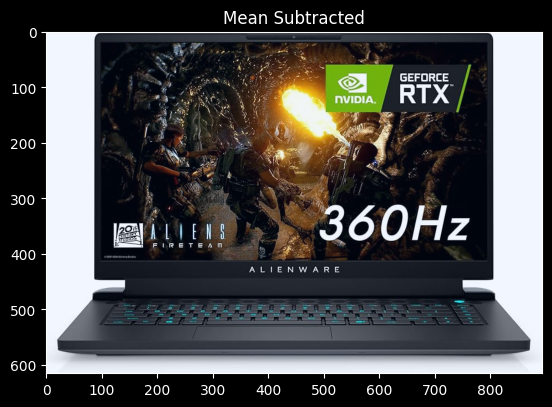

In [26]:
if img is not None:
    # Tính giá trị trung bình của từng kênh màu và trừ đi
    mean_val = np.mean(img_rgb, axis=(0, 1))
    mean_subtracted = img_rgb.astype("float32") - mean_val
    # Chuẩn hóa về khoảng [0, 255] để hiển thị
    mean_subtracted = cv2.normalize(mean_subtracted, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    plt.imshow(mean_subtracted)
    plt.title('Mean Subtracted')
    plt.show()


### Blobs Detection (Phát hiện đốm/vùng)


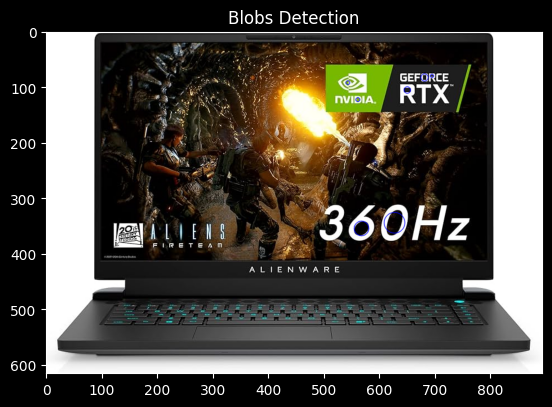

In [17]:
if img is not None:
    detector = cv2.SimpleBlobDetector_create()
    keypoints = detector.detect(gray_img)
    # Vẽ các blob phát hiện được
    img_with_blobs = cv2.drawKeypoints(img_rgb, keypoints, np.array([]), (0, 0, 255),
                                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_blobs)
    plt.title('Blobs Detection')
    plt.show()
